<h1>IDENTIFICACION DE PATRONES DE VIAJES COMPARTIDOS DE LA EMPREZA ZUBER</h1>

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.


<h2>1.- IMPORTANDO LIBRERIAS</h2>

In [191]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

<h2>2.- IMPORTANDO BASE DE DATOS</h2>

In [192]:
# Cargamos los archivos csv"
sql_result_01 = pd.read_csv("dataset/moved_project_sql_result_01.csv") 
sql_result_04 = pd.read_csv("dataset/moved_project_sql_result_04.csv") 
sql_result_07 = pd.read_csv("dataset/moved_project_sql_result_07.csv") 
 

<h2>3.- EXPLORACION DE LA DATA</h2>

### 3.1. sql_result_01

Contiene los siguientes datos:
- `company_name`: nombre de la empresa de taxis
- `trips_amount`: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

In [193]:
sql_result_01.info()
print()
print(sql_result_01.describe())
print()
sql_result_01.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000



,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Se tienen 64 filas de data en el DF `sql_result_01`, no se aprecia data `NaN` y los formatos de las columnas son las correctas.

### 3.2. sql_result_04

Contiene los siguientes datos:
- `dropoff_location_name`: barrios de Chicago donde finalizaron los viajes
- `average_trips`: el promedio de viajes que terminaron en cada barrio en noviembre de 2017. 

In [194]:
sql_result_04.info()
print()
print(sql_result_04.describe())
print()
sql_result_04.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466670



,dropoff_location_name,average_trips
0,Loop,10727.466670
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Se tienen 94 filas de data en el DF `sql_result_04`, no se aprecia data `NaN` y los formatos de las columnas son las correctas.

### 3.3. sql_result_07

Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:
- `start_ts`: fecha y hora de la recogida
- `weather_conditions`: condiciones climáticas en el momento en el que comenzó el viaje
- `duration_seconds`: duración del viaje en segundos

In [195]:
sql_result_07.info()
print()
print(sql_result_07.describe())
print()
sql_result_07.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000



,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 7:00:00,Good,1440.0


Se tienen 1068 filas de data en el DF `sql_result_07`, no se aprecia data `NaN` y es necesario modificar el tipo de data de  la columna `start_ts` de object (string) a date. Asimismo la duracion minima de los viajes es 0 segundos, lo cual es erroneo.

<h2>4.- PRE PROCESAMIENTO DE DATA</h2>

### 4.1. CORRECION DEL TIPO DE DATO DE LA COLUMNA `start_ts` de la DF sql_result_07

In [196]:
# Cambiando el tipo de dato de la columna 'start_ts' a datetime
sql_result_07['start_ts'] = pd.to_datetime(sql_result_07['start_ts'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Creamos las columnas 'Fecha', 'Hora' y 'Dia_semana'
sql_result_07['Fecha'] = sql_result_07['start_ts'].dt.date
sql_result_07['Hora'] = sql_result_07['start_ts'].dt.time
sql_result_07['Dia_semana'] = sql_result_07['start_ts'].dt.day_name()

sql_result_07.info()
print()
sql_result_07.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   Fecha               1068 non-null   object        
 4   Hora                1068 non-null   object        
 5   Dia_semana          1068 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 50.2+ KB



,start_ts,weather_conditions,duration_seconds,Fecha,Hora,Dia_semana
0,2017-11-25 16:00:00,Good,2410.0,2017-11-25,16:00:00,Saturday
1,2017-11-25 14:00:00,Good,1920.0,2017-11-25,14:00:00,Saturday
2,2017-11-25 12:00:00,Good,1543.0,2017-11-25,12:00:00,Saturday
3,2017-11-04 10:00:00,Good,2512.0,2017-11-04,10:00:00,Saturday
4,2017-11-11 07:00:00,Good,1440.0,2017-11-11,07:00:00,Saturday


### 4.2. CONTEO DE LA CANTIDAD DE VIAJES POR DIA DE RECOJO.

In [197]:
# Contamos la catidad de viajes de los dias de recojo de los viajes
print(sql_result_07.value_counts('Fecha'))
print()
# Contamos la catidad de viajes de los dias de recojo de los viajes
print(sql_result_07.value_counts('Dia_semana'))

Fecha
2017-11-11    426
2017-11-04    367
2017-11-18    180
2017-11-25     95
Name: count, dtype: int64

Dia_semana
Saturday    1068
Name: count, dtype: int64


Todos los viajes realizado dentro de la DF `sql_result_07` se realizaron los dias `Saturday / Sabado`

### 4.3. ELIMINACION DE LOS VIAJES CON 0 SEGUNDOS DE DURACION DE LA DF sql_result_07

In [198]:
# Filtramos y eliminamos los datos 0 la data frame sql_result_07
sql_result_07 = sql_result_07.query("duration_seconds != 0")
sql_result_07

,start_ts,weather_conditions,duration_seconds,Fecha,Hora,Dia_semana
0,2017-11-25 16:00:00,Good,2410.0,2017-11-25,16:00:00,Saturday
1,2017-11-25 14:00:00,Good,1920.0,2017-11-25,14:00:00,Saturday
2,2017-11-25 12:00:00,Good,1543.0,2017-11-25,12:00:00,Saturday
3,2017-11-04 10:00:00,Good,2512.0,2017-11-04,10:00:00,Saturday
4,2017-11-11 07:00:00,Good,1440.0,2017-11-11,07:00:00,Saturday
...,...,...,...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0,2017-11-11,06:00:00,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,2017-11-11,10:00:00,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,2017-11-11,13:00:00,Saturday
1066,2017-11-11 08:00:00,Good,1380.0,2017-11-11,08:00:00,Saturday


<h2>5.- PROCESAMIENTO DE DATA</h2>

### 5.1. IDENTIFICAR LOS 10 PRINCIPALES BARRIOS EN TERMINOS DE FINALIZACION DEL RECORRIDO.

In [199]:
# IDENTIFICAMOS LOS BARRIOS PRINCIPALES EN BASE AL PROMEDIO DE VIAJES QUE TERMINARON EN ESE BARRIO
# USANDO LA COLUMNA 'average_trips'
top_10_barrios = (sql_result_04.sort_values(by= 'average_trips', ascending=False)).head(10)

# Redondeamos los valores de y convertimos a valor entero 'int'
top_10_barrios['average_trips'] = top_10_barrios['average_trips'].round(0).astype('int')

top_10_barrios


,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


Vemos que en la lista de principales barrios donde termino el recorrido, el barrio `Loop` y `River North` son los mas popular del top 10 con 10000 viajes en promedio.

### 5.2. GRAFICOS 1: 10 BARRIOS PRINCIPALES POR NUMERO DE FINALIZACIONES

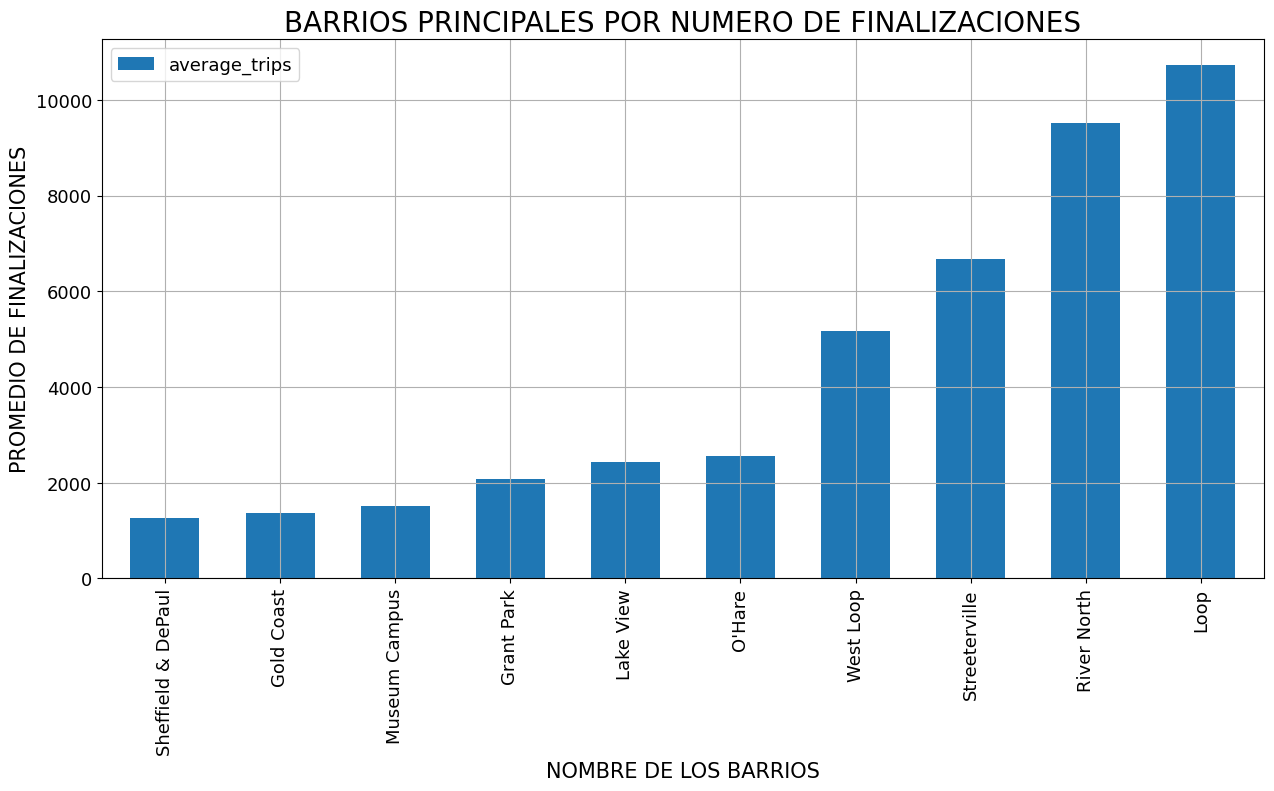

In [200]:
barrios_10_graf = top_10_barrios.sort_values(by='average_trips', ascending= True)
ax = barrios_10_graf.plot(kind='bar', x='dropoff_location_name', y='average_trips', 
                     grid=True, 
                     figsize=(15, 7), 
                     width=0.6)

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_title('BARRIOS PRINCIPALES POR NUMERO DE FINALIZACIONES', fontsize=20)
ax.set_xlabel('NOMBRE DE LOS BARRIOS', fontsize=15)
ax.set_ylabel('PROMEDIO DE FINALIZACIONES', fontsize=15)
ax.legend(fontsize=13)
plt.show()

### 5.3. GRAFICOS 2: EMPRESAS DE TAXI Y SUS NUMERO DE VIAJES

La DF sql_result_01 contiene la data de las empresas de taxi y el numero de viajes de cada compania los dias 15 y 16 de noviembre del 2017.

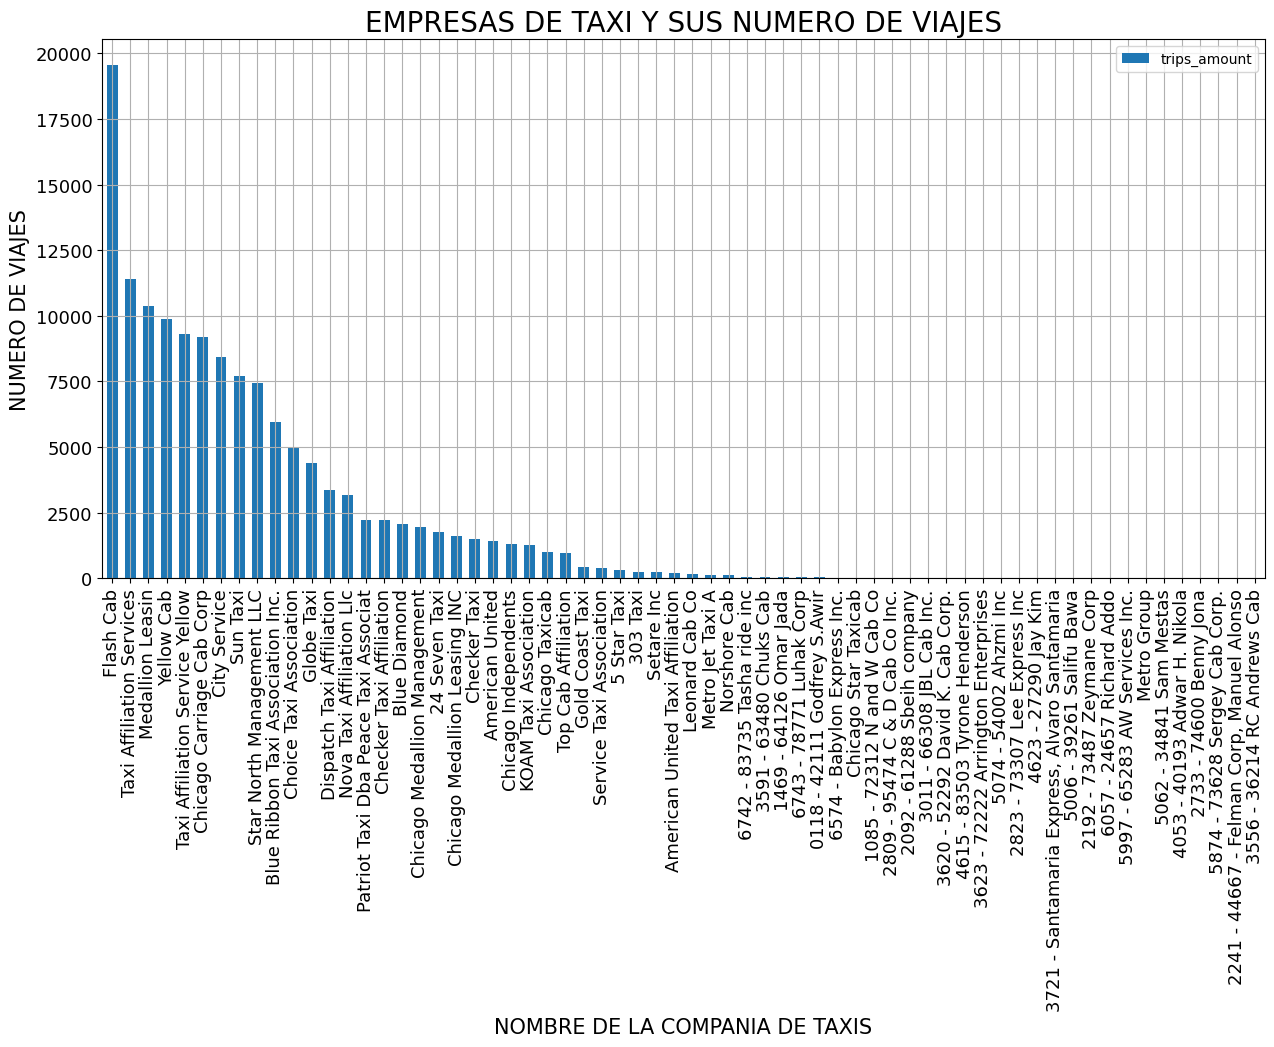

In [201]:
ax = sql_result_01.plot(kind='bar', x='company_name', y='trips_amount', 
                     grid=True, 
                     figsize=(15, 7), 
                     width=0.6)

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_title('EMPRESAS DE TAXI Y SUS NUMERO DE VIAJES', fontsize=20)
ax.set_xlabel('NOMBRE DE LA COMPANIA DE TAXIS', fontsize=15)
ax.set_ylabel('NUMERO DE VIAJES', fontsize=15)

plt.show()


Se aprecia que la cantidad de viajes de la mayoria de companias de taxi no reprecenta importancia en la grafica, por lo que graficaremos las primeras 20 companias.

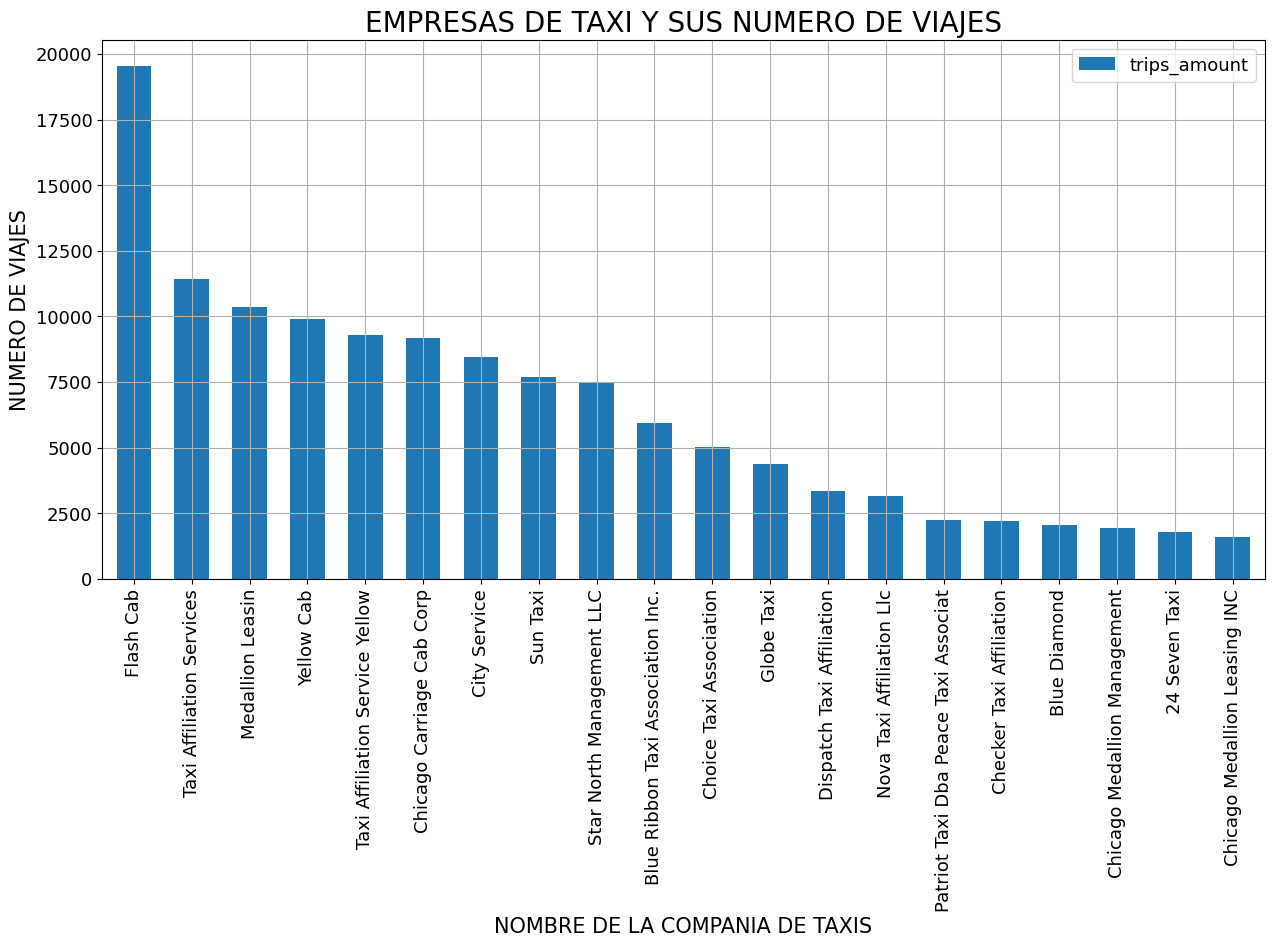

In [202]:
companias20 = sql_result_01.sort_values(by='trips_amount', ascending=False).head(20)
barrios_10_graf = top_10_barrios.sort_values(by='average_trips', ascending= True)
ax = companias20.plot(kind='bar', x= 'company_name', y='trips_amount', 
                     grid=True, 
                     figsize=(15, 7), 
                     width=0.6)

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.set_title('EMPRESAS DE TAXI Y SUS NUMERO DE VIAJES', fontsize=20)
ax.set_xlabel('NOMBRE DE LA COMPANIA DE TAXIS', fontsize=15)
ax.set_ylabel('NUMERO DE VIAJES', fontsize=15)
ax.legend(fontsize=13)
plt.show()

In [203]:
# Mostramos la tabla de las 20 primeras companias
companias20.head(20)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


La compania `Flash Cab` es la mas activa con casi 20,000 viajes entre los dias 15 y 16 de noviembre del 2017, seguida de la compania `Taxi Affiliation Services`

### 5.4. CONCLUSIONES:
Despues del analisi de la data, se puede visualizar la preferencia del uso del sevicio de Zuber en el barrio de `Loop` y que la compania con mas viajes es `Flash Cab`.

<h2>6.- PRUEBA DE HIPOTESIS

Prueba la hipótesis:

`La duración promedio de los viajes desde `Loop` hasta el `Aeropuerto Internacional O'Hare` cambia los sábados lluviosos.`

The hypothesis statement is not clear on how to group the data. There are two options for grouping the data, one based on overall weather conditions, and one based on whether it rained for at least an hour on a particular Sunday. Without clarification from a colleague, we will explore both options and discuss the limitations of each approach when conducting tests.

To test both hypotheses, we will use a t-test which is commonly used when comparing the means of two populations from a dataset. However, it's important to keep in mind that the t-test is sensitive to outliers, as it is based on the sample mean and variance. Therefore, it's crucial to check for statistical outliers before running the test.

### 6.1. FORMULACION DE HIPOTESIS:
 - `HIPOTESIS NULA`: La duracion promedio de los viajes desde Loop hasta el Aereopuerto Internacional O'Hare son iguales los sabados lluviosos.

 - `Hipotesis Alternativa`:  La duracion promedio de los viajes desde Loop hasta el Aereopuerto Internacional O'Hare cambia los sabados lluviosos.

Analizaremos la data:

In [204]:
sql_result_07.head(5)

,start_ts,weather_conditions,duration_seconds,Fecha,Hora,Dia_semana
0,2017-11-25 16:00:00,Good,2410.0,2017-11-25,16:00:00,Saturday
1,2017-11-25 14:00:00,Good,1920.0,2017-11-25,14:00:00,Saturday
2,2017-11-25 12:00:00,Good,1543.0,2017-11-25,12:00:00,Saturday
3,2017-11-04 10:00:00,Good,2512.0,2017-11-04,10:00:00,Saturday
4,2017-11-11 07:00:00,Good,1440.0,2017-11-11,07:00:00,Saturday


Visualizacion de la data:

[Text(0.5, 1.0, "Duracion de los viajes desde el barrio de Loop al Aereopurto O'Hare "),
 Text(0.5, 0, 'Fecha de recojo'),
 Text(0, 0.5, 'Duracion del viaje (seg)')]

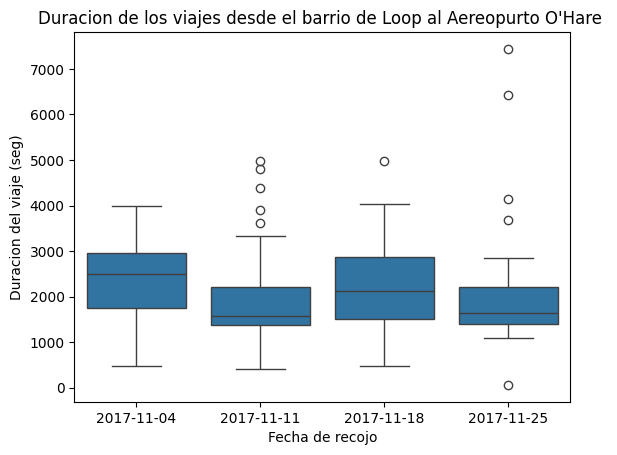

In [223]:
# Diagrama de bloques
sql_result_07 = sql_result_07.sort_values(by='Fecha', ascending=True)
sns.boxplot(data = sql_result_07, x = 'Fecha', y = 'duration_seconds').\
            set(title = "Duracion de los viajes desde el barrio de Loop al Aereopurto O'Hare ",
                                                 xlabel = 'Fecha de recojo', 
                                                 ylabel = 'Duracion del viaje (seg)')

Observaciones del grafico:
- Previamente ya se eliminaron los viajes tienen una duracion de 0 segundos.
- Algunos viajes tiene una duracion entre 0 a 2000 segundos, los cuales se encuentran fuera del primer cuartil.
- Hubieron viajes con mas de 3000 segundos de duracion (fuera del tercer cuartil), podemos suponer que estos viajes tuvieron retrasos por diversas condiciones como condiciones climaticas, trafico, accidentes, etc.

Se procedera a eliminar estos valores atipicos.

In [226]:
# Filtramos valores atipicos:
extremo_inferior = sql_result_07.query('duration_seconds < 1500')

extremo_superior = sql_result_07.query('duration_seconds > 3500')

# Eliminamos los datos atipicos
outlier_list = list(outliers_short.index) + list(outliers_long.index)
print(outlier_list)

result_07_typ = result_07.drop(outlier_list)
result_07_typ.info()



,start_ts,weather_conditions,duration_seconds,Fecha,Hora,Dia_semana
462,2017-11-04 05:00:00,Good,1200.0,2017-11-04,05:00:00,Saturday
927,2017-11-04 08:00:00,Good,1260.0,2017-11-04,08:00:00,Saturday
933,2017-11-04 07:00:00,Good,1200.0,2017-11-04,07:00:00,Saturday
938,2017-11-04 04:00:00,Good,1341.0,2017-11-04,04:00:00,Saturday
406,2017-11-04 06:00:00,Good,1293.0,2017-11-04,06:00:00,Saturday
...,...,...,...,...,...,...
929,2017-11-25 12:00:00,Good,1440.0,2017-11-25,12:00:00,Saturday
952,2017-11-25 05:00:00,Good,1440.0,2017-11-25,05:00:00,Saturday
396,2017-11-25 07:00:00,Good,1217.0,2017-11-25,07:00:00,Saturday
415,2017-11-25 06:00:00,Good,1331.0,2017-11-25,06:00:00,Saturday


,start_ts,weather_conditions,duration_seconds,Fecha,Hora,Dia_semana
437,2017-11-04 14:00:00,Good,3528.0,2017-11-04,14:00:00,Saturday
409,2017-11-04 15:00:00,Good,3615.0,2017-11-04,15:00:00,Saturday
945,2017-11-04 15:00:00,Good,3699.0,2017-11-04,15:00:00,Saturday
937,2017-11-04 14:00:00,Good,3539.0,2017-11-04,14:00:00,Saturday
476,2017-11-04 14:00:00,Good,3540.0,2017-11-04,14:00:00,Saturday
506,2017-11-04 14:00:00,Good,3510.0,2017-11-04,14:00:00,Saturday
925,2017-11-04 14:00:00,Good,3831.0,2017-11-04,14:00:00,Saturday
326,2017-11-04 14:00:00,Good,3887.0,2017-11-04,14:00:00,Saturday
798,2017-11-04 14:00:00,Good,3982.0,2017-11-04,14:00:00,Saturday
675,2017-11-04 14:00:00,Good,3840.0,2017-11-04,14:00:00,Saturday


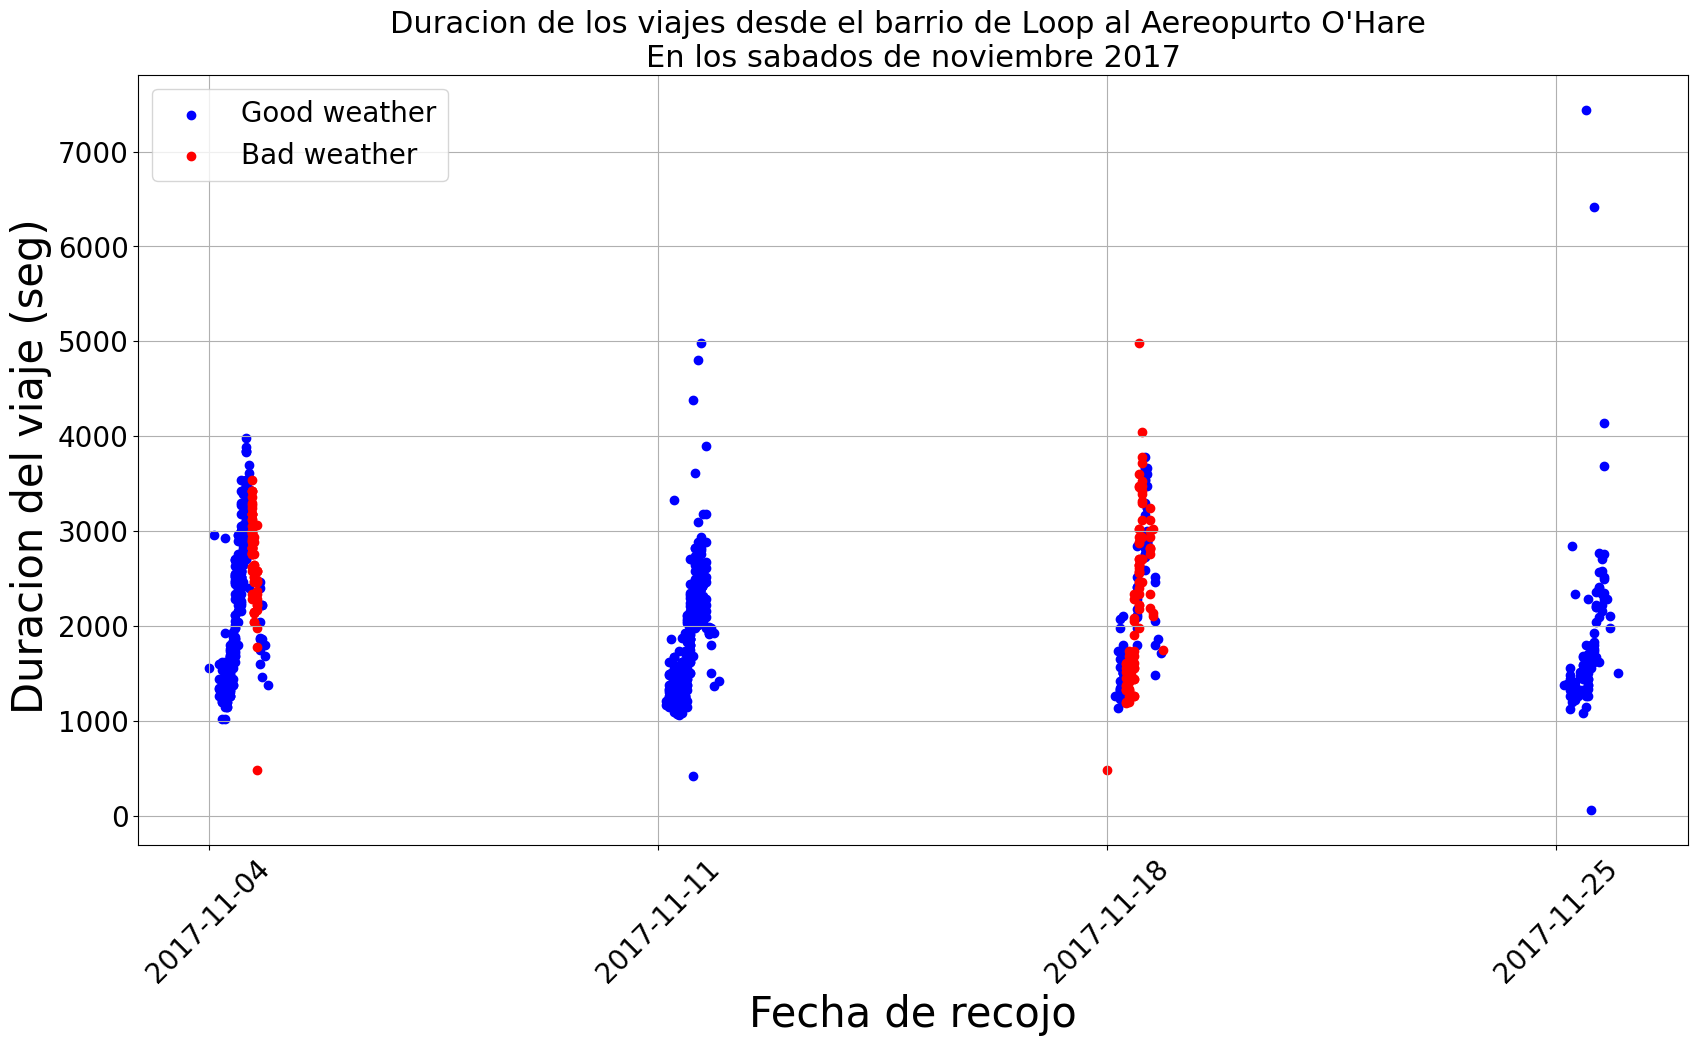

In [205]:
# Grafico de dispersion
plt.figure(figsize=(20,10))
plt.scatter(sql_result_07.loc[sql_result_07['weather_conditions'] == 'Good','start_ts'], 
            sql_result_07.loc[sql_result_07['weather_conditions'] == 'Good', 'duration_seconds'],
            c='Blue', label='Good weather')
plt.scatter(sql_result_07.loc[sql_result_07['weather_conditions'] == 'Bad','start_ts'], 
            sql_result_07.loc[sql_result_07['weather_conditions'] == 'Bad', 'duration_seconds'], 
            c='Red', label='Bad weather')
plt.title("Duracion de los viajes desde el barrio de Loop al Aereopurto O'Hare \n"
          "En los sabados de noviembre 2017",
          fontsize=22)
plt.legend(fontsize=20)
plt.ylabel("Duracion del viaje (seg)", fontsize=30)
plt.xlabel('Fecha de recojo', fontsize=30)
plt.xticks(sql_result_07['start_ts'].dt.date.unique(), fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid()
plt.show()


Then, we drop these outliers from our test data.

It's time to run the test. The scipy library has implemented the test algorithms, so you don't have to worry about coding. However, we need to decide on the values for two variables. The first is the critical value alpha, which sets the significance level for hypothesis testing. It should be set to 5%. The second is the "equal_var" argument for the test algorithm. This argument should be set to true if the samples are expected to come from populations with similar parameters, and false if they are expected to come from populations with different parameters. To determine the value of this argument, we should calculate the empirical variances for each sample group and set it to true if the variances do not differ by more than 5%. If the difference is large, set it to false.

In [18]:
# Testing the Hypothesis

# Get results
results_bad = result_07_typ.loc[result_07_typ['weather_conditions']=='Bad']
results_good = result_07_typ.loc[(result_07_typ['weather_conditions']=='Good')]

# Get sample 1
sample_1 = results_bad['duration_seconds'].to_numpy() 
                            
# Get sample 2
sample_2 = results_good['duration_seconds'].to_numpy()


# Check if sample variances differ more than 5%
eq_var = False
pct_c1 = np.abs(np.var(sample_1)-np.var(sample_2)) / np.var(sample_1)
pct_c2 = np.abs(np.var(sample_1)-np.var(sample_2)) / np.var(sample_2)

if pct_c1 <= 0.05 or pct_c2 <= 0.05:
    eq_var = True

alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

# Perform the test
results = st.ttest_ind(sample_1, sample_2, equal_var=eq_var)
# results = st.ttest_rel(sample_1, sample_2)



print('Sample mean of ride durations in "Bad" weather:', 
      '{} seconds'.format(np.mean(sample_1).round(0).astype('int')))
print('Sample mean of ride durations in "Good" weather:', 
      '{} seconds'.format(np.mean(sample_2).round(0).astype('int')))
print()
print('eq_var argument of t-test set to:', eq_var)
print()
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 
    

Sample mean of ride durations in "Bad" weather: 2426 seconds
Sample mean of ride durations in "Good" weather: 1994 seconds

eq_var argument of t-test set to: False

p-value:  1.083629710157954e-13
We reject the null hypothesis


You can see that the sample means of ride durations in 'Bad' and 'Good' weather times are different. Test results show that the probability of randomly getting a difference of this size or more is close to zero (1.08e^{-13}%). Therefore, we can reject the null hypothesis and conclude that there is a significant difference in average travel times for trips made in "Good" and "Bad" weather.

We performed a first hypothesis test by grouping the data into 'Good' and 'Bad' weather samples. However, as we will show later, this approach can be misleading because it does not take into account other potential external factors that may play a role. Rush hour (if the weather happens to be bad) may have caused it, rather than bad weather (alone or not). Let's draw the scatterplot again (without the deleted points) and make additional observations from there.

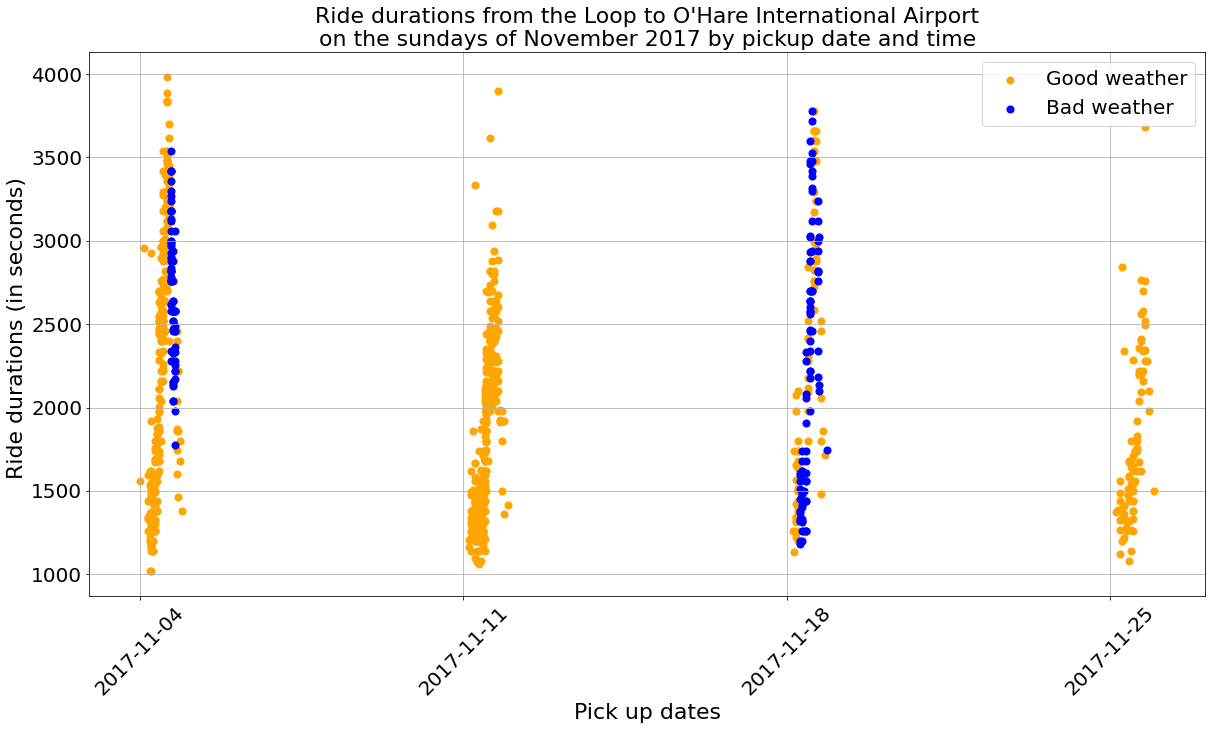

In [19]:
# Generate scatter plot
plt.figure(figsize=(20,10))
plt.scatter(result_07_typ.loc[result_07['weather_conditions'] == 'Good','start_ts'], 
            result_07_typ.loc[result_07['weather_conditions'] == 'Good', 'duration_seconds'], 
            s=50, c='Orange', label='Good weather')
plt.scatter(result_07_typ.loc[result_07['weather_conditions'] == 'Bad','start_ts'], 
            result_07_typ.loc[result_07['weather_conditions'] == 'Bad', 'duration_seconds'], 
            s=50, c='Blue', label='Bad weather')
plt.title("Ride durations from the Loop to O'Hare International Airport\n"
          "on the sundays of November 2017 by pickup date and time",
          fontsize=22)
plt.legend(fontsize=20)
plt.ylabel("Ride durations (in seconds) ", fontsize=22)
plt.xlabel('Pick up dates', fontsize=22)
plt.xticks(result_07['start_ts'].dt.date.unique(), fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid()
plt.show()


For each Sunday in November 2017, there is an elongated cluster of points in the data. From these clusters, we can observe the following:

- The lower limit of the clusters is around 1000 seconds, or 17 minutes.
- Ride durations within the clusters can be up to three times longer than the lower limit.
- The first and third Sundays have more rides that last between 3000 to 4000 seconds, or 67 minutes, compared to the second and fourth Sundays, where the upper limit is around 50 minutes.
- Interestingly, the first and third clusters correspond to rainy Sundays, even though the weather is not necessarily tagged as 'Bad' for all of the rides. Both the orange and blue clusters, corresponding to 'Good' and 'Bad' weather conditions, respectively, are elongated in shape.

In summary, we have reached two conclusions. Firstly, there are variations in ride durations within each cluster, but weather conditions do not appear to be the main cause. This suggests that there may be other external factors affecting ride durations, such as peak hour traffic. This is not surprising as we all know that ride durations can vary depending on traffic. The clusters of points seem to fall within a reasonable range, and variations in ride durations could also depend on the exact pick-up location in the Loop neighborhood and the route taken by the taxi driver. However, we expect these secondary factors to have less significant impact. Based on this conclusion, we can hypothesize that average ride durations change according to the time of day (peak versus non-peak hours). We will not perform a formal hypothesis test, but we will analyze outliers through visualizations in the next subsection to provide some insight on this hypothesis.

Secondly, there are variations in the upper limits of ride durations among clusters. These variations seem to occur in parallel with the overall weather situation of the Sunday. Therefore, we hypothesize that the average ride duration is longer on rainy Sundays, which we will formally test in the next subsection.

<a class="anchor" id="step5-2"></a> 
#### Step 5.2 Second test:

We formulate the null and alternative hypotheses as follows:
- **Null Hypothesis:** The hourly average durations of rides from Loop neighborhood to O'Hare International Airport on Sundays with bad and good weathers are equal. 
- **Alternative Hypothesis:** The hourly average duration of rides from Loop neighborhood to O'Hare International Airport on bad weather Sundays differs from good ones.

Let us now plot the data for each sunday of the month separately. We will also mark the weather condition on these plots.

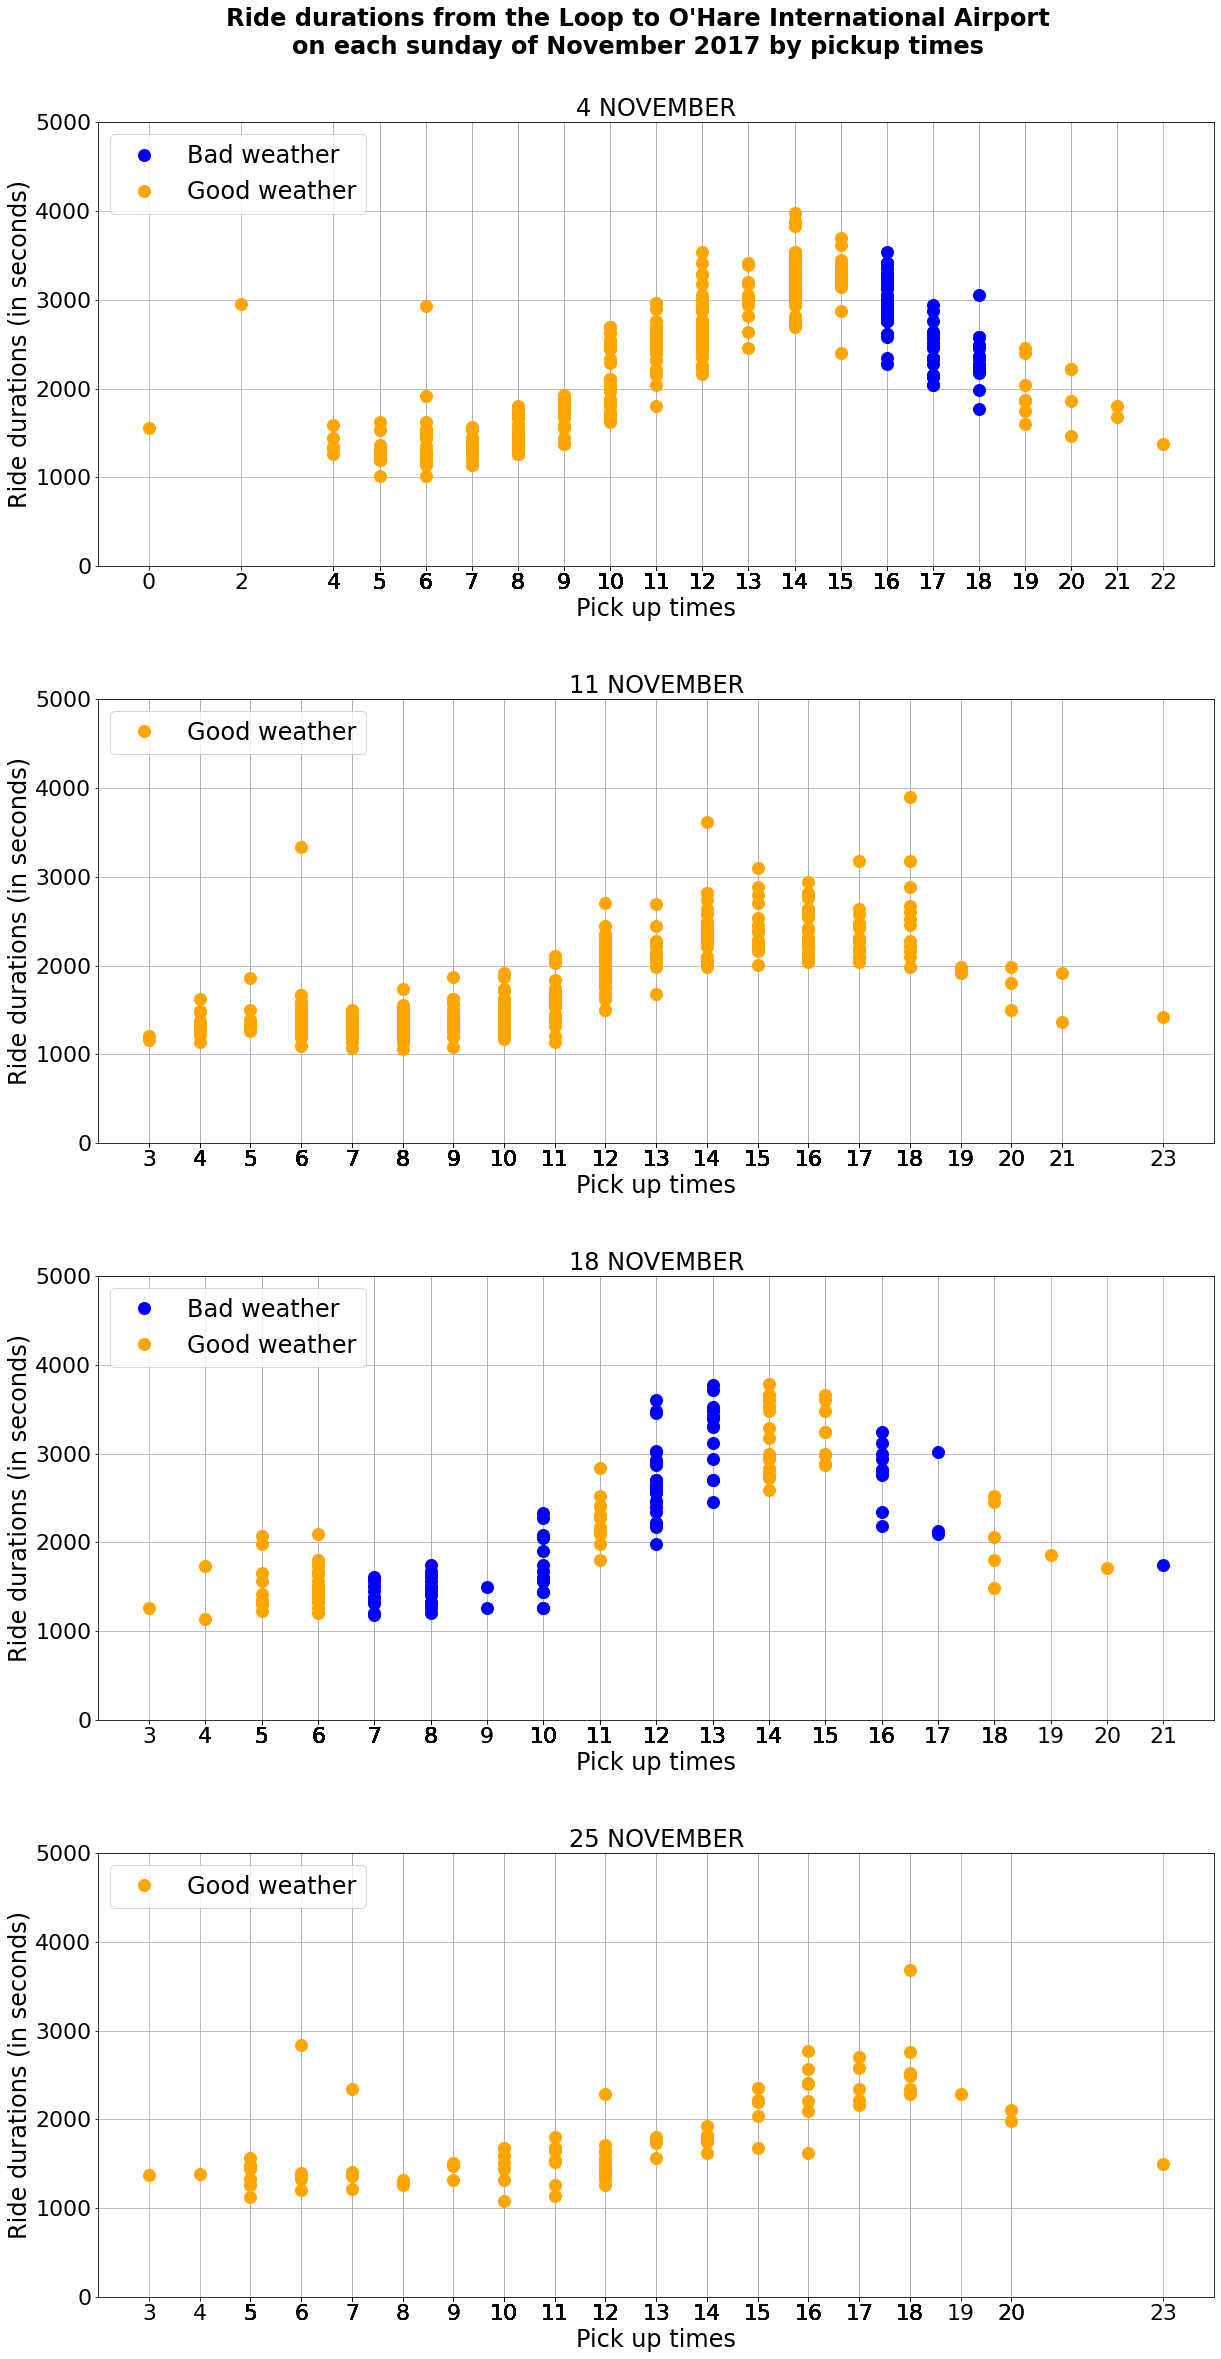

In [20]:
# Generate plot of hourly ride durations for each Sunday
fig, ax = plt.subplots(4, 1, figsize=(20, 40))

groups_1 = result_07_typ.groupby(by='start_date')

colors = {'Good':'orange', 'Bad':'blue'}

i = 0
for name, group in groups_1:
    groups_2 = group.groupby(by='weather_conditions')
    for name_2, group_2 in groups_2:

        ax[i].plot(group_2['start_time'], group_2['duration_seconds'],
               marker='o', linestyle='', ms=12, 
                label='{} weather'.format(name_2), c = colors[group_2['weather_conditions'].max()]
               )
        ax[i].legend(fontsize=24, loc= 'upper left')
    ax[i].set_title('{} NOVEMBER'.format(str.upper(str(name))), fontsize=24, fontweight='light')
    ax[i].grid()
    ax[i].set_xlabel('Pick up times', fontsize=24)
    ax[i].set_ylabel('Ride durations (in seconds)', fontsize=24)
#    ax[i].set_yticks(fontsize=20, rotation=45)
    ax[i].set_ylim(0, 5000)
    ax[i].tick_params(axis='x', labelsize=22)
    ax[i].tick_params(axis='y', labelsize=22)
    ax[i].set_xticks(group['start_time'])
    i += 1

plt.suptitle("Ride durations from the Loop to O'Hare International Airport\n"
          "on each sunday of November 2017 by pickup times\n\n",
          fontsize=24, fontweight='bold', y=.92)


# Adjust spacing between the subplots
plt.subplots_adjust(hspace = 0.3)
plt.show()



From the plot, we can see that afternoon rides tend to be longer in duration, which supports our previous suspicion that in-cluster variations may be caused by peak hours. We also observe that the last Sunday of the month has more uniform ride durations except for a few cases, which could be due to less data for the last Sunday or it could be real. Additionally, we can see that not all statistical outliers have been removed, such as the ride that took more than 1000 seconds (17 minutes more) than all the other rides on the last Sunday at 6:00 am, which could be due to the ride being shared by multiple clients. To ensure that we include only typical rides, we should remove these points manually before computing the average ride durations for each hour. An outlier detection algorithm could have been useful, but since we have only a few points to remove and they can be visually identified, we will remove them manually.

In [21]:
# Drop outliers from 4 November
# Rides taking more than 2500 seconds at 02:00 and 06:00
result_07_typ = result_07_typ.drop(list(result_07_typ.loc[(result_07['start_date'] == 4) 
                                                      & (result_07_typ['start_time'].isin([2, 6])) &
                                                      (result_07['duration_seconds'] > 2500)].index))


    

# Drop outliers from 11 November
# rides taking more than 3000 seconds at 06:00, 14:00, 17:00, and 18:00 
result_07_typ = result_07_typ.drop(list(result_07_typ.loc[(result_07_typ['start_date'] == 11) 
                                                      & (result_07_typ['start_time'].isin([6, 14, 17, 18])) &
                                                      (result_07_typ['duration_seconds'] > 3000)].index))

# Drop outliers from 25 November
# rides taking more than 2000 seconds at 06:00, 07:00, and 12:00 
result_07_typ = result_07_typ.drop(list(result_07_typ.loc[(result_07_typ['start_date'] == 25) 
                                                      & (result_07_typ['start_time'].isin([6, 7, 12])) &
                                                      (result_07_typ['duration_seconds'] > 2000)].index))
# Rides taking more than 3000 seconds at 18:00
result_07_typ = result_07_typ.drop(list(result_07_typ.loc[(result_07_typ['start_date'] == 25) 
                                                      & (result_07_typ['start_time'] == 18) &
                                                      (result_07_typ['duration_seconds'] > 3000)].index))

result_07_typ.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1039 non-null   datetime64[ns]
 1   weather_conditions  1039 non-null   object        
 2   duration_seconds    1039 non-null   float64       
 3   start_date          1039 non-null   int64         
 4   start_time          1039 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 48.7+ KB


Next, we compute the hourly average ride durations for each Sundays separetely. Note that by taking separate averages for each Sunday, we compute an estimate of the hourly average ride durations with all external conditions being (almost) identical.

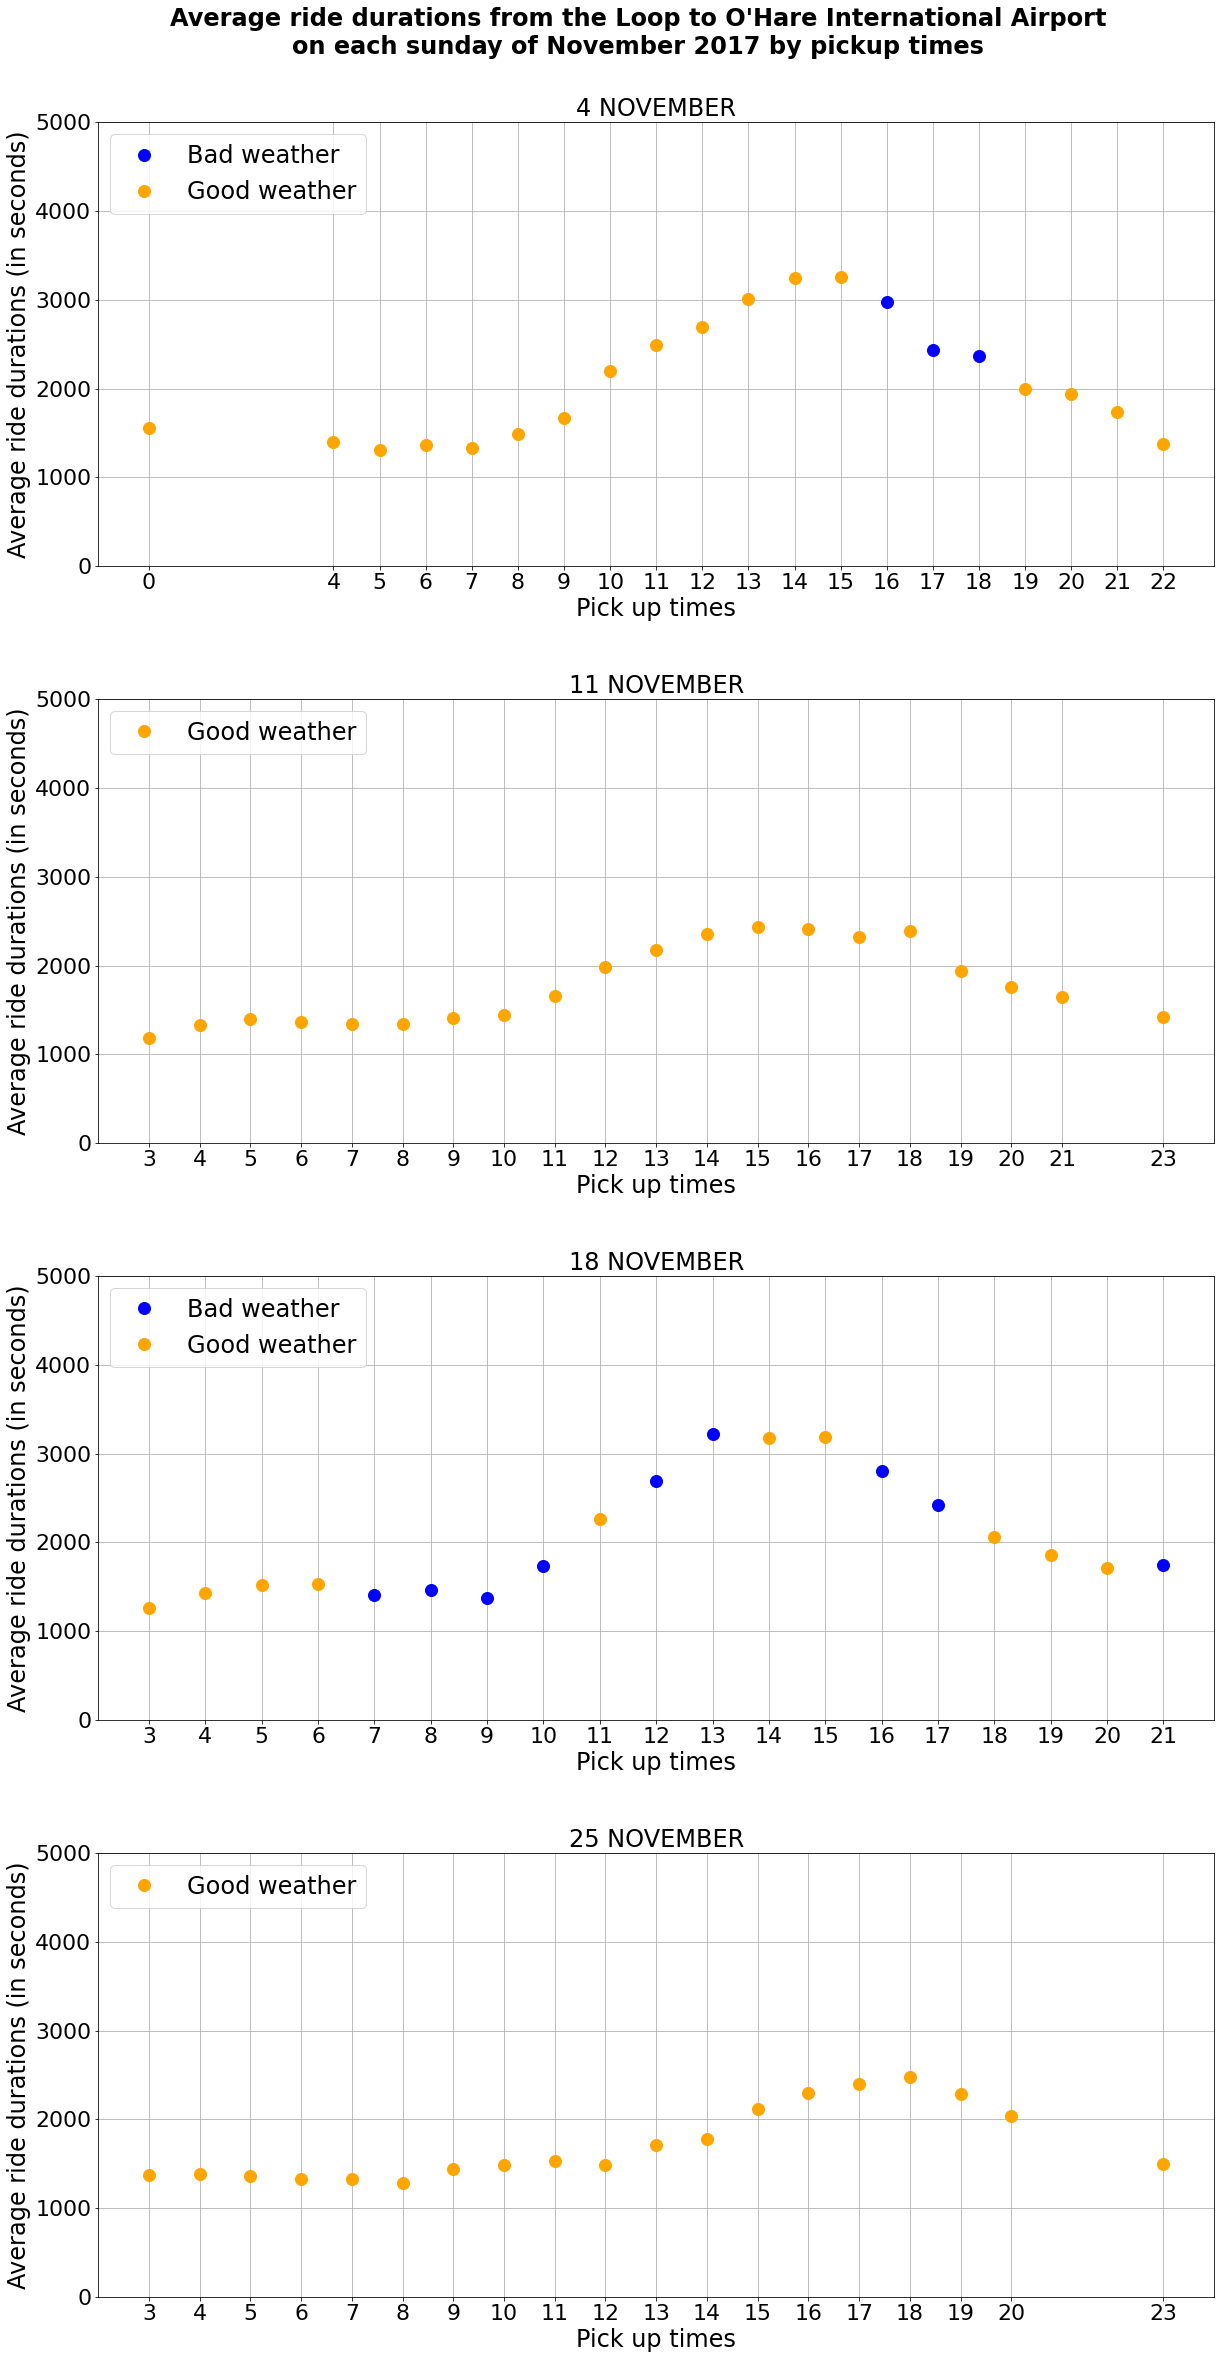

In [22]:
# Generate plot of hourly average ride durations for each Sunday
fig, ax = plt.subplots(4, 1, figsize=(20, 40))

result_07_typ_averaged = result_07_typ.groupby(by=['start_date', 'start_time']).agg(
    {'duration_seconds':'mean', 'weather_conditions':'max'}).reset_index()

colors = {'Good':'orange', 'Bad':'blue'}


# Set the value of the maximum number of rows that can be displayed to 100.
pd.set_option('display.max_rows', 100)

groups_1 = result_07_typ_averaged.groupby(by='start_date')

i = 0
for name, group in groups_1:
    groups_2 = group.groupby(by='weather_conditions')
    for name_2, group_2 in groups_2:

        ax[i].plot(group_2['start_time'], group_2['duration_seconds'],
               marker='o', linestyle='', ms=12, 
               label='{} weather'.format(name_2), c = colors[group_2['weather_conditions'].max()]
               )
        ax[i].legend(fontsize=24,  loc= 'upper left')
    ax[i].set_title('{} NOVEMBER'.format(str.upper(str(name))), fontsize=24, fontweight='light')
    ax[i].grid()
    ax[i].set_xlabel('Pick up times', fontsize=24)
    ax[i].set_ylabel('Average ride durations (in seconds)', fontsize=24)
#    ax[i].set_yticks(fontsize=20, rotation=45)
    ax[i].set_ylim(0, 5000)

    ax[i].tick_params(axis='x', labelsize=22)
    ax[i].tick_params(axis='y', labelsize=22)
    ax[i].set_xticks(group['start_time'])
    i += 1

plt.suptitle("Average ride durations from the Loop to O'Hare International Airport\n"
          "on each sunday of November 2017 by pickup times\n\n",
          fontsize=24, fontweight='bold', y=.92)


# Adjust spacing between the subplots
plt.subplots_adjust(hspace = 0.3)
plt.show()


We will now formally test our hypothesis. One option would be to perform multiple independent tests, one for each hour where we have both good and bad weather samples. However, we only have a limited number of samples for each hour. Instead, we suggest using a paired sample t-test. This test is used to determine whether the mean difference between two sets of observations is zero. It is commonly used in clinical studies, but we find it appropriate for our case as well. We will take the mean of the hourly average ride durations for Sundays 4 and 18 November, as the weather was bad at some times on these Sundays. These mean values will be our first set of bad weather Sunday samples. We will repeat the same process for Sundays 11 and 25 November to get our good weather Sunday samples. The bad and good weather Sunday mean of hourly average ride duration samples will be considered as two hourly paired measurements taken at different weather conditions. The null hypothesis predicts that the true mean difference between the paired samples is zero, and any observable differences are explained by random variation. The alternative hypothesis assumes that the true mean difference between the paired samples is not equal to zero. For the paired sample t-test, we only need to set the alpha value, which we will set to 5%.

In [23]:
# Test hypothesis

# Filter data to get the bad weather samples
results_bad = result_07_typ_averaged.loc[result_07_typ_averaged['start_date'].isin([4, 18])].groupby(
    by=['start_time']).agg({'duration_seconds':'mean'}).reset_index().sort_values(by='start_time')
results_bad = results_bad.iloc[1:-1]

# Filter data to get the good weather samples
results_good = result_07_typ_averaged.loc[result_07_typ_averaged['start_date'].isin([11, 25])].groupby(
    by=['start_time']).agg({'duration_seconds':'mean'}).reset_index().sort_values(by='start_time')
results_good = results_good.iloc[:-1]

# Get sample 1
sample_1 = results_bad['duration_seconds'].to_numpy() 
                            
# Get sample 2
sample_2 = results_good['duration_seconds'].to_numpy()

alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

# Perform the test
# results = st.ttest_ind(sample_1, sample_2, equal_var=eq_var)
results = st.ttest_rel(sample_1, sample_2)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 
    

p-value:  0.006082828154971968
We reject the null hypothesis


Here the p-value tells us that there is 0.6% probability of obtaining a result like the one that was observed if the null hypothesis was true. Hence, we reject the null hypothesis and conclude that the mean of the hourly average ride durations for bad weather Sundays differ significantly from the ones for good weather Sundays. 

In this step, we conducted two hypothesis tests to formally examine the relationship between ride durations and weather conditions. Initially, we filtered the data based on Good and Bad weather conditions to generate our two sets of test samples. However, we acknowledged the potential limitation of this approach and found that variations in ride durations could also be caused by peak hours. Therefore, we performed a second test by pairing the hourly means of the hourly average ride durations for the first and third Sundays of the month with the hourly means of those for the second and fourth Sundays of the month. The results of the tests are summarized in Step 6.

<a class="anchor" id="step6"></a> 
### Step 6 General conclusion

In this project, we analyzed ride-sharing data from Sundays in November 2017. We began by preparing the data for analysis by doing necessary data pre-processing. Our first task was to identify our most successful business partners, specifically the top taxi companies, and our target clients' preferences. We discovered that taxi affiliate networks and associations were our top business partners, with the Flash Cab company being the most successful, having almost double the number of rides compared to its closest competitor. Our target clients were found to mostly take rides to the Loop neighborhood, which is described as a vibrant area featuring eclectic eateries, shops, theaters and parks, mostly comprising of high-rises.

As a second task, we studied the dependence of ride durations on weather conditions. Scatter plots of ride durations for each Sunday of November 2017 showed variations in ride durations within clusters and variations in upper limits of ride durations among clusters. To further investigate this, we generated various plots showing the hourly ride durations and their averages for each Sunday. This helped us to see that in-cluster ride durations varied according to peak hours, with afternoon rides tending to be longer. This pattern occurred in both good and bad weather conditions. However, we noticed that on Sundays with bad weather (rainy at some times of the day), ride durations tended to be longer during peak hours, but not necessarily outside of peak afternoon hours. This led to the observed variations in upper limits of ride durations among clusters. Our hypothesis test revealed that the hourly means of the hourly average ride durations for bad weather Sundays were different from those for good weather Sundays. Based on our observations, one possible explanation for this could be that when a day is forecasted to be bad, more people may prefer to use private transportation, such as their own cars or taxis. In these cases, non-peak hour ride durations may not be affected significantly even if it rains. However, during peak hours, even if it does not rain the whole day, the already longer ride durations will tend to last even longer. In other words, bad weather itself could certainly slow down rides, but its impact is felt most significantly